# Exploración y Análisis de Taquerías en la Ciudad de México utilizando Python y Ciencia de Datos

##  Introducción:
La Ciudad de México es mundialmente reconocida por su vasta y diversa oferta gastronómica, siendo las taquerías uno de los pilares fundamentales de la cultura culinaria urbana. Con miles de establecimientos repartidos por toda la capital, identificar patrones de ubicación, popularidad y accesibilidad puede aportar valor tanto para consumidores como para futuros emprendedores gastronómicos.

Este proyecto busca aplicar herramientas de programación en Python para explorar, visualizar y analizar datos reales de taquerías en CDMX, abarcando desde estadísticas descriptivas básicas hasta análisis espaciales y rankings ponderados.

El proposito principal de este análisis es encontrar los mejores tacos de la ciudad de Mexico quisimos llevar nuestro proyecto a otro nivel, ya que nos preguntamos si existía la posibilidad  de encontrar los datos de el API de google maps, ya que de los datos que las personas y los negocios proporcionan dáa a día a la plataforma de google maps son demasiado valiosos.

En CDMX y área conurbada existen más de 10000 taquerias las cueales se dividen entre locales y negocios callejeros, así que logramos extraer una muestra de 3000 mil datos de los cuales nos surguieron las siguientes preguntas: 

### -¿Cuáles son los mejores tacos de la CDMX? 
### -¿Cuáles son los mejores tacos cerca de ESCOM? 
### -¿Cáles son los más pupulares? 
### -¿Cuáles son los más recomendados? 
### Mejores tacos por delegación
### ¿Cuáles son los peores tacos de CDMX?


### Objetivos 

### Objetivo General
#### Analizar, visualizar y evaluar datos de taquerías en la Ciudad de México para identificar tendencias de popularidad, ubicación y accesibilidad utilizando herramientas de ciencia de datos.

### Objetivos específicos
1. Aplicar estadística descriptiva al data frame obtenido de las taquerías que están registradas en google maps, utilizando biblotecas de python como numppy y pandas
2. Encontrar taquerías destacadas con la información del DataFrame 
3. Encontrar la taquería con mejor calificación en toda la CDMX 
4. Encontrar la mejor taquería cercana a ESCOM
5. Destacas las taquerías con peores calificaciones
6. Realizar limpieza del DataFrame; y con este nuevo DataFrame aplicar estadistica descriptiva 
7. Agrupar y visualizar datos del DataFrame
8. Diseñar e implementar un ranking ponderado más justo para determinar las taquerías más recomendables 

## Metodología 
El proyecto se desarrolla en varias etapas, desde la obtención de datos hasta el análisis geográfico y ponderado

### Primera parte: Obtención del DataFrame
El dataset fue generado utilizando la API de Google Places, mediante consultas con palabras clave como "taquerías en Ciudad de México", lo cual permitió recuperar información de establecimientos comerciales clasificados como taquerías en la capital.

La extracción de datos se realizó mediante peticiones del tipo Text Search en la API, obteniendo los siguientes atributos por cada establecimiento:

name: nombre del lugar

address: dirección textual

lat, lng: coordenadas geográficas

rating: calificación promedio otorgada por los usuarios

userRatingCount: número de reseñas

priceLevel: nivel de precio categórico

website: sitio web del establecimiento (si está disponible)

La información fue almacenada en un archivo.csv y cargada en Python para su análisis posterior con pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Leer el archivo limpio y ya ordenado
df = pd.read_csv("tacos_CDMX_sorted.csv")
print('Columnas disponibles: ',df.columns.tolist())


Columnas disponibles:  ['name', 'address', 'lat', 'lng', 'rating', 'userRatingCount', 'priceLevel', 'website']


### Mostramos todas las columnas de el dataset.
Columnas disponibles:  ['name', 'address', 'lat', 'lng', 'rating', 'userRatingCount', 'priceLevel', 'website']


### Mostramos el dataset completo 

In [2]:
df

,name,address,lat,lng,rating,userRatingCount,priceLevel,website
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,PRICE_LEVEL_MODERATE,NaN
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,PRICE_LEVEL_INEXPENSIVE,NaN
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,PRICE_LEVEL_MODERATE,NaN
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...
...,...,...,...,...,...,...,...,...
3120,Tacos el monkiki,"Av. Acueducto 126, San Pedro Zacatenco, Gustav...",19.508614,-99.123017,NaN,NaN,NaN,NaN
3121,Tacos Los Castigados,"Lic. Benito Juárez 4-local 4d, San Juan Ixhuat...",19.519046,-99.107378,NaN,NaN,NaN,NaN
3122,Tacos de guisado Dani,"Av. Enrique Torres Calderón 129, El Risco CTM,...",19.509832,-99.095862,NaN,NaN,NaN,NaN
3123,Tacos De Guisado,"Manzana 013, Jardines del Tepeyac, 55220 Ecate...",19.514318,-99.051786,NaN,NaN,NaN,NaN


## Metodología 

### Segunda parte: Análisis Estadístico Descriptivo

#### Filtraremos taquerías con datos utiles
Quitaremos las que no tengan calificación y después las que tengan menos de 10 calificaciones.

In [3]:
#UserRating count es el numero de calificaciones
dataFiltrada= df[df['userRatingCount']>=20]
print(dataFiltrada.shape)
dataFiltrada

(1672, 8)


,name,address,lat,lng,rating,userRatingCount,priceLevel,website
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,PRICE_LEVEL_MODERATE,NaN
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,PRICE_LEVEL_INEXPENSIVE,NaN
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,PRICE_LEVEL_MODERATE,NaN
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...
...,...,...,...,...,...,...,...,...
1667,Tacos zarigüeya,"Calle pescadores, edif, Lucio Blanco 02100, El...",19.511756,-99.202968,4.9,20.0,NaN,NaN
1668,Tacos Jorge,"Av. México Coyoacán 347, Gral Anaya, Benito Ju...",19.359836,-99.163481,3.5,20.0,NaN,NaN
1669,Tacos De Mixiotes Estilo Hidalgo,"C. 4, Olivar del Conde 1ra Secc, Álvaro Obregó...",19.375605,-99.203441,4.0,20.0,NaN,NaN
1670,De Colores - cafetería y restaurante,"Carr. Picacho-Ajusco 124, Jardines en la Monta...",19.299789,-99.208974,4.9,20.0,NaN,NaN


# Como primer paso arrojaremos las taquerías mejor calificadas en la ciudad 


In [4]:
top= dataFiltrada.sort_values(by='rating',ascending=False).head(15)
top
#sort_values ordena de mayor a menor el rating


,name,address,lat,lng,rating,userRatingCount,priceLevel,website
1643,"Tacos ""El Cuñado""","Xochiquetzal, Santa Isabel Tola, Gustavo A. Ma...",19.494116,-99.113799,5.0,21.0,NaN,NaN
1671,Tacos El JAROCHITO,"Atanacio G Sarabia metrobus, Escuadrón 201, Iz...",19.361126,-99.114451,5.0,20.0,NaN,NaN
1650,"Elemental: Hamburguesas, tacos y más...","Alemán 19, Progresista, Iztapalapa, 09240 Ciud...",19.361435,-99.065601,5.0,21.0,NaN,NaN
1657,Tacos EL TIBU,"Convento 113, Amp el Santuario, Iztapalapa, 09...",19.351409,-99.094491,5.0,20.0,NaN,NaN
1651,Taconalas,"Grecia 24, San Alvaro, Azcapotzalco, 02090 Ciu...",19.463448,-99.184402,5.0,21.0,NaN,https://www.facebook.com/TaconalasAzcapotzalco/
1616,Taco'n Huevos,"Av 613 215 B, San juan de aragon 4ta seccion, ...",19.456630,-99.068438,5.0,22.0,NaN,NaN
1005,"Tacos Luigi ""El profesional ""","C. 710 57189, Amp San Juan de Aragón CTM, 0799...",19.456985,-99.054157,5.0,124.0,NaN,NaN
1564,"Tacos de canasta ""Nancy""🧺🌮","Calle Benito Juárez 6, El Mirador, 54080 Tlaln...",19.517416,-99.219602,5.0,25.0,NaN,https://www.facebook.com/profile.php?id=100076...
1577,Tacos Zacapoaxtla Plutarco,"Avenida Presidente Plutarco Elías Calles, Don ...",19.379378,-99.135019,5.0,25.0,NaN,NaN
1348,"Mexican Tacos, Col. Roma","Coahuila 148, Roma Nte., Cuauhtémoc, 06700 Cua...",19.411158,-99.162863,5.0,47.0,NaN,https://www.mxtacos.mx/


In [5]:
taqueriasExcelentes= dataFiltrada[dataFiltrada['rating']>=5]
taqueriasExcelentes= taqueriasExcelentes.sort_values(by='userRatingCount', ascending=False).head(300)
print(taqueriasExcelentes.shape)
taqueriasExcelentes
#Aqui podemos visualizzar las taquerías mejor calificadas y con un gran numero de reviews

(19, 8)


,name,address,lat,lng,rating,userRatingCount,priceLevel,website
1005,"Tacos Luigi ""El profesional ""","C. 710 57189, Amp San Juan de Aragón CTM, 0799...",19.456985,-99.054157,5.0,124.0,NaN,NaN
1199,TACOS DE ASADA DON NACHO ¡TRAKAS!,"PEDRO BARANDA 4, Tabacalera, Cuauhtémoc, 06030...",19.436662,-99.151766,5.0,69.0,NaN,NaN
1348,"Mexican Tacos, Col. Roma","Coahuila 148, Roma Nte., Cuauhtémoc, 06700 Cua...",19.411158,-99.162863,5.0,47.0,NaN,https://www.mxtacos.mx/
1372,TACOS EL DON,"Boulevard cataratas, sin número esquina, Llanu...",19.310281,-99.200957,5.0,44.0,NaN,NaN
1415,"Tacos y burritos ""la china""","Calle . San Lorenzo, esquina con, C. Gabriel M...",19.373411,-99.167576,5.0,38.0,NaN,NaN
1490,Parrilla Leon,"Av. John F. Kennedy 5 B, Emiliano Zapata 2da S...",19.504901,-99.065134,5.0,32.0,NaN,https://www.tiktok.com/@ivan.hernndez7576
1526,LOS AUTÉNTICOS TACOS HERRERA,"C. 39 10, Santa Cruz Meyehualco, Iztapalapa, 0...",19.343870,-99.040892,5.0,28.0,NaN,NaN
1559,Tackoer,"Berenjena 40, Col, Lomas el Manto, Iztapalapa,...",19.349252,-99.086610,5.0,26.0,NaN,https://tackoer.ueniweb.com/?utm_campaign=gmb
1564,"Tacos de canasta ""Nancy""🧺🌮","Calle Benito Juárez 6, El Mirador, 54080 Tlaln...",19.517416,-99.219602,5.0,25.0,NaN,https://www.facebook.com/profile.php?id=100076...
1565,Tacos Tomy,"Casa del Obrero Mundial 684, Atenor Salas, Ben...",19.402482,-99.146715,5.0,25.0,NaN,http://www.instagram.com/coffeeandtacostomy


In [6]:
#con value_counts()contamos el numero de calificaciones por rating
# y lo ordenamos con sort_index()
# Esto nos da una idea de la distribucion de las calificaciones
numero_calificaciones= dataFiltrada['rating'].value_counts().sort_index()
numero_calificaciones


rating
2.0      1
2.1      1
2.3      1
2.5      1
2.6      1
3.1      1
3.2      2
3.3      5
3.4      4
3.5      8
3.6      9
3.7      8
3.8     31
3.9     29
4.0     69
4.1    114
4.2    152
4.3    245
4.4    285
4.5    234
4.6    230
4.7    133
4.8     55
4.9     34
5.0     19
Name: count, dtype: int64

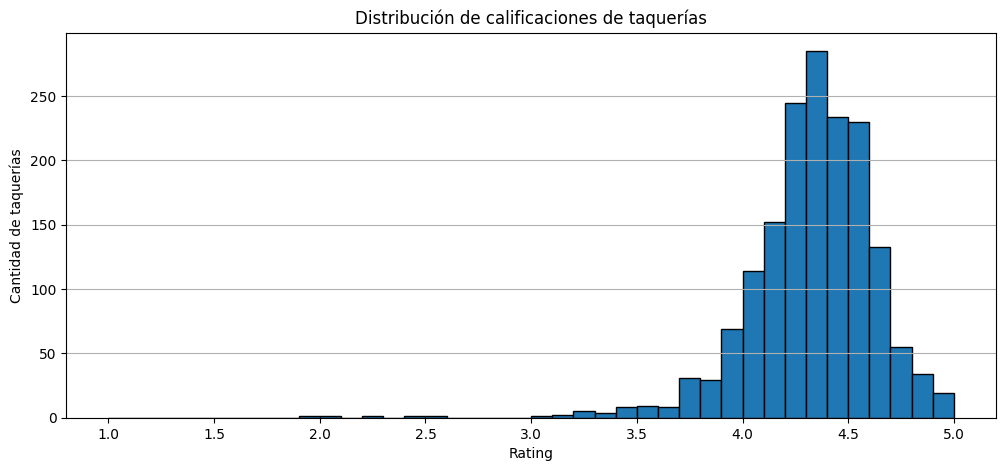

In [7]:
# Graficar la distribución de calificaciones
plt.figure(figsize=(12, 5))
plt.hist(dataFiltrada['rating'], bins=np.arange(1, 5.1, 0.1), edgecolor='black')
plt.title('Distribución de calificaciones de taquerías')
plt.xlabel('Rating')
plt.ylabel('Cantidad de taquerías')
plt.grid(axis='y')
plt.show()

##### Promedio de calificaciones
Primero analizamos el promedio del taset completo.
Después el promedio de el daataset ya filtrados, sin las taquerías que tienen menos de 5 calificaciones.


In [8]:
print('Media  general de calificaciones: ', df['rating'].mean())
print('Media  general de calificaciones filtradas: ', dataFiltrada['rating'].mean())

Media  general de calificaciones:  4.436426116838488
Media  general de calificaciones filtradas:  4.3797846889952154


####### Con el promedio general de calificaciones es de 4.43 nos damos cuenta que la mayoría de los tacos con más calificaciones estan por debajo del promedio, por lo tanto nos podemos tomar el numero de calificaciones como la metrica para conseguir el mejor taco de la cuidad. 

####


#### Mostraremos las taquerías y las calificaciones pero en lugar de una tabla las muestra con un punto.


Coeficiente (pendiente): -9.694925042338677e-06
Intercepto: 4.388915093396243


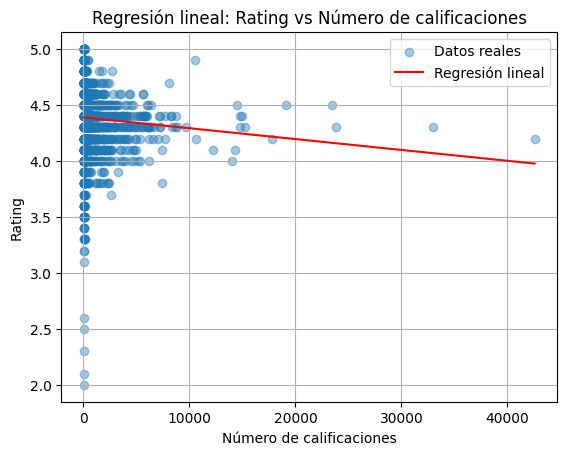

In [9]:

# Extraer los datos
X = dataFiltrada['userRatingCount'].values
y = dataFiltrada['rating'].values

# Calcular la pendiente (m) y el intercepto (b) de la recta: y = mX + b
m, b = np.polyfit(X, y, 1)  # Regresión lineal de grado 1

# Predicción
y_pred = m * X + b

# Imprimir coeficientes
print("Coeficiente (pendiente):", m)
print("Intercepto:", b)

# Gráfica
plt.scatter(X, y, alpha=0.4, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Número de calificaciones')
plt.ylabel('Rating')
plt.title('Regresión lineal: Rating vs Número de calificaciones')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df

,name,address,lat,lng,rating,userRatingCount,priceLevel,website
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,PRICE_LEVEL_MODERATE,NaN
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,PRICE_LEVEL_INEXPENSIVE,NaN
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,PRICE_LEVEL_MODERATE,NaN
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...
...,...,...,...,...,...,...,...,...
3120,Tacos el monkiki,"Av. Acueducto 126, San Pedro Zacatenco, Gustav...",19.508614,-99.123017,NaN,NaN,NaN,NaN
3121,Tacos Los Castigados,"Lic. Benito Juárez 4-local 4d, San Juan Ixhuat...",19.519046,-99.107378,NaN,NaN,NaN,NaN
3122,Tacos de guisado Dani,"Av. Enrique Torres Calderón 129, El Risco CTM,...",19.509832,-99.095862,NaN,NaN,NaN,NaN
3123,Tacos De Guisado,"Manzana 013, Jardines del Tepeyac, 55220 Ecate...",19.514318,-99.051786,NaN,NaN,NaN,NaN


### Mejores taquerías por alcaldía 



In [11]:
#Lista de Alcaldias 
alcaldias_cdmx = [
    'Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa',
    'Cuauhtémoc', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras',
    'Miguel Hidalgo', 'Milpa Alta', 'Tláhuac', 'Tlalpan', 'Venustiano Carranza', 'Xochimilco'
]

#Función para extraer alcaldías 
def extraer_alcaldia(direccion):
    for alcaldia in alcaldias_cdmx:
        if alcaldia.lower() in direccion.lower():
            return alcaldia
    return "No identificada"

df_copia2 = df.copy()
df_filtrado2 = df_copia2[df_copia2['userRatingCount'] > 20]
df_filtrado2['alcaldia'] = df_filtrado2['address'].apply(extraer_alcaldia)

df_filtrado2

C:\Users\grise\AppData\Local\Temp\ipykernel_13472\1999941220.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado2['alcaldia'] = df_filtrado2['address'].apply(extraer_alcaldia)


,name,address,lat,lng,rating,userRatingCount,priceLevel,website,alcaldia
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/,Miguel Hidalgo
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,PRICE_LEVEL_MODERATE,NaN,Iztacalco
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,PRICE_LEVEL_INEXPENSIVE,NaN,Cuauhtémoc
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,PRICE_LEVEL_MODERATE,NaN,No identificada
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...,Gustavo A. Madero
...,...,...,...,...,...,...,...,...,...
1651,Taconalas,"Grecia 24, San Alvaro, Azcapotzalco, 02090 Ciu...",19.463448,-99.184402,5.0,21.0,NaN,https://www.facebook.com/TaconalasAzcapotzalco/,Azcapotzalco
1652,Tacos carmelita,"Topantiagua 12, Santa Catarina, Azcapotzalco, ...",19.492121,-99.176350,4.5,21.0,NaN,NaN,Azcapotzalco
1653,La Patrona,"Av. Panamericana, Pedregal de Carrasco, Coyoac...",19.304053,-99.180041,3.5,21.0,NaN,NaN,Coyoacán
1654,Mega tacos Los Manitos,"Dolores guerrero, Rosario Castellanos, Coapa, ...",19.315090,-99.103861,3.9,21.0,NaN,NaN,Coyoacán


In [12]:
# Obtener mejor taquería por alcaldía 
mejores_por_alcaldia_rating = df_filtrado2.loc[
    df_filtrado2.groupby('alcaldia')['rating'].idxmax()
].reset_index(drop=True)

mejores_por_alcaldia_rating



,name,address,lat,lng,rating,userRatingCount,priceLevel,website,alcaldia
0,Taconalas,"Grecia 24, San Alvaro, Azcapotzalco, 02090 Ciu...",19.463448,-99.184402,5.0,21.0,NaN,https://www.facebook.com/TaconalasAzcapotzalco/,Azcapotzalco
1,"Tacos y burritos ""la china""","Calle . San Lorenzo, esquina con, C. Gabriel M...",19.373411,-99.167576,5.0,38.0,NaN,NaN,Benito Juárez
2,TACOS EL DON,"Boulevard cataratas, sin número esquina, Llanu...",19.310281,-99.200957,5.0,44.0,NaN,NaN,Coyoacán
3,TACOS DE ASADA DON NACHO ¡TRAKAS!,"PEDRO BARANDA 4, Tabacalera, Cuauhtémoc, 06030...",19.436662,-99.151766,5.0,69.0,NaN,NaN,Cuauhtémoc
4,Taco'n Huevos,"Av 613 215 B, San juan de aragon 4ta seccion, ...",19.456630,-99.068438,5.0,22.0,NaN,NaN,Gustavo A. Madero
5,Tacos El güerito,"Av Sur 12 610, Agrícola Oriental, Iztacalco, 0...",19.395342,-99.061183,4.8,201.0,NaN,NaN,Iztacalco
6,LOS AUTÉNTICOS TACOS HERRERA,"C. 39 10, Santa Cruz Meyehualco, Iztapalapa, 0...",19.343870,-99.040892,5.0,28.0,NaN,NaN,Iztapalapa
7,Taquería Chuchin,"Zona comercial sur, colonia unidad independenc...",19.331812,-99.212128,4.6,1257.0,PRICE_LEVEL_MODERATE,NaN,La Magdalena Contreras
8,Mochomos,"Av. Paseo de las Palmas 781, Lomas de Chapulte...",19.429235,-99.216386,4.9,10499.0,PRICE_LEVEL_EXPENSIVE,http://mochomos.mx/,Miguel Hidalgo
9,"Tacos Luigi ""El profesional ""","C. 710 57189, Amp San Juan de Aragón CTM, 0799...",19.456985,-99.054157,5.0,124.0,NaN,NaN,No identificada


## Metodología 

### Tercera Parte: Limpieza del DataSet

In [13]:
# Verificar columnas clave antes de limpiar
print("Nulos por columna en el dataset original:")
print(df.isnull().sum())

# Crear una copia del DataFrame original para limpiarlo
df_limpio = df.copy()

# 🔹 1. Eliminar filas con NaN en columnas clave
columnas_clave = ['rating', 'userRatingCount', 'priceLevel', 'lat', 'lng']
df_limpio = df_limpio.dropna(subset=columnas_clave)

# 🔹 2. Mapear priceLevel de texto a valores numéricos
price_mapping = {
    'PRICE_LEVEL_FREE': 0,
    'PRICE_LEVEL_INEXPENSIVE': 1,
    'PRICE_LEVEL_MODERATE': 2,
    'PRICE_LEVEL_EXPENSIVE': 3,
    'PRICE_LEVEL_VERY_EXPENSIVE': 4
}
df_limpio['priceLevel'] = df_limpio['priceLevel'].map(price_mapping)

# 🔹 3. Convertir columnas a formato numérico adecuado
df_limpio['rating'] = pd.to_numeric(df_limpio['rating'], errors='coerce')
df_limpio['userRatingCount'] = pd.to_numeric(df_limpio['userRatingCount'], errors='coerce')
df_limpio['priceLevel'] = pd.to_numeric(df_limpio['priceLevel'], errors='coerce').astype('Int64')
df_limpio['lat'] = pd.to_numeric(df_limpio['lat'], errors='coerce')
df_limpio['lng'] = pd.to_numeric(df_limpio['lng'], errors='coerce')

# 🔹 4. Eliminar duplicados
df_limpio = df_limpio.drop_duplicates()

# Reporte final
print("\nNulos por columna en el DataFrame limpio:")
print(df_limpio.isnull().sum())
print("\nTamaño final del DataFrame limpio:", df_limpio.shape)

Nulos por columna en el dataset original:
name                  0
address               0
lat                   0
lng                   0
rating              215
userRatingCount     215
priceLevel         2370
website            2683
dtype: int64

Nulos por columna en el DataFrame limpio:
name                 0
address              0
lat                  0
lng                  0
rating               0
userRatingCount      0
priceLevel           0
website            535
dtype: int64

Tamaño final del DataFrame limpio: (755, 8)


In [14]:
df_limpio

,name,address,lat,lng,rating,userRatingCount,priceLevel,website
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,2,http://www.taqueriaelborregoviudo.mx/
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,2,NaN
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,1,NaN
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,2,NaN
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,1,https://www.facebook.com/Tacos-El-Papi-2173667...
...,...,...,...,...,...,...,...,...
1592,Carnitas Los Picosos,"Av. Revolución 2034, C.U., Coyoacán, 01090 Ciu...",19.336787,-99.193340,4.6,24.0,1,NaN
1684,Tacos el Jhon,"Militar Marte, Iztacalco, 08810 Ciudad de Méxi...",19.385618,-99.128202,4.7,19.0,1,NaN
1757,Tacos El Maya,"Padre Hidalgo 41, Norte, Álvaro Obregón, 01410...",19.377549,-99.204530,4.3,16.0,1,NaN
1911,Taquería - Tacos Winni'e,"Calle Sta. Cruz 75, Las Arboledas, Tláhuac, 13...",19.306993,-99.050308,4.1,11.0,1,NaN


In [28]:
#  1. Estadísticas generales
print("Estadísticas generales del DataFrame limpio:\n")
print(df_limpio.describe(include='all'))

# 2. Conteo total de taquerías
total_taquerias = len(df_limpio)
print(f"\nTotal de taquerías: {total_taquerias}")

#  3. Media y desviación estándar de calificación
media_rating = df_limpio['rating'].mean()
std_rating = df_limpio['rating'].std()
print(f"\nCalificación promedio: {media_rating:.2f}")
print(f"Desviación estándar de calificación: {std_rating:.2f}")

# 4. Media y desviación estándar del número de reseñas
media_resenas = df_limpio['userRatingCount'].mean()
std_resenas = df_limpio['userRatingCount'].std()
print(f"\n Reseñas promedio: {media_resenas:.2f}")
print(f"Desviación estándar de reseñas: {std_resenas:.2f}")




Estadísticas generales del DataFrame limpio:

                  name                                            address  \
count              755                                                755   
unique             709                                                751   
top     Tacos El Paisa  Pedregal 24, Lomas - Virreyes, Molino del Rey,...   
freq                 9                                                  2   
mean               NaN                                                NaN   
std                NaN                                                NaN   
min                NaN                                                NaN   
25%                NaN                                                NaN   
50%                NaN                                                NaN   
75%                NaN                                                NaN   
max                NaN                                                NaN   

               lat         ln

### Taquerías con peor y mejor calificación en DataFrame limpio

In [26]:
df_limpio_ordenado = df_limpio.sort_values(by='rating', ascending=False)
df_limpio_ordenado.head(10)

,name,address,lat,lng,rating,userRatingCount,priceLevel,website
2888,"Tacos ""Los Arcos""","Nayarit 179, Peñón de los Baños, Venustiano Ca...",19.441288,-99.079071,5.0,1.0,2,NaN
15,Mochomos,"Av. Paseo de las Palmas 781, Lomas de Chapulte...",19.429235,-99.216386,4.9,10499.0,3,http://mochomos.mx/
1422,Tacos de la Vero,"C. Miguel Velazquez Mancilla Manzana 061, 10 d...",19.487461,-99.218806,4.9,38.0,1,NaN
873,"Tacos ""Tona""","Rotograbados 35, Venustiano Carranza, 15340 Ci...",19.439214,-99.112024,4.8,188.0,1,NaN
848,Tacos El Penas,"De La Rosa 140-106, Santa Apolonia, Azcapotzal...",19.475646,-99.194536,4.8,204.0,1,NaN
145,Perros y Burros Cuicuilco,"Av. Insurgentes Sur 3500, Manantial Peña Pobre...",19.297893,-99.180803,4.8,2701.0,2,https://www.perrosyburros.com/
919,"Tacos ""El Fer""","Pje. Allende 152, Guerrero, Cuauhtémoc, 06300 ...",19.447094,-99.136852,4.8,162.0,1,NaN
1261,Tacos Espinosa,"Av Cultura Griega 69, Rosario 1 Sector II CD, ...",19.513901,-99.196625,4.7,59.0,1,NaN
1260,Smoky Taco,"Av Fernando Amilpa 129, Atzacoalco CTM, Gustav...",19.508051,-99.097854,4.7,60.0,1,NaN
1487,"Tacos ""El padrino""","Jacarandas 10, Los Ángeles, Iztapalapa, 09830 ...",19.345527,-99.069641,4.7,32.0,1,NaN


In [27]:
df_limpio_ordenado.tail(5)


,name,address,lat,lng,rating,userRatingCount,priceLevel,website
325,El Tizoncito,"Av Moliere 335, Polanco, Polanco III Secc, Mig...",19.437275,-99.200781,3.8,1180.0,2,http://www.eltizoncito.com.mx/
164,El Payo,"Cam. a Sta. Fe 369, Zenón Delgado, Álvaro Obre...",19.388028,-99.214883,3.8,2397.0,2,NaN
1449,Tacos el guero de a varo,"Eje 5 Ote 630, Leyes de Reforma 3ra Secc, Izta...",19.382795,-99.076339,3.7,35.0,1,NaN
153,El taquito Carrillo,"Felipe Carrillo Puerto, Legaria, Miguel Hidalg...",19.454539,-99.196565,3.7,2600.0,1,NaN
1213,Sopes y Tacos la Palma Grande,"Circunvalación 611, Centro Histórico de la Cda...",19.426996,-99.125638,3.6,67.0,1,NaN


## Metodología

### Cuarta parte : Ranking ponderado 

El objetivo es crear un ranking más justo y así encontrar las taquerías más recomendables tomando en cuenta:
Calidad (rating)
Popularidad (userRatingCount)
Accesibilidad (priceLevel)

Con el objetivo de determinar de forma objetiva cuáles son las taquerías más recomendables de la Ciudad de México, se diseñó un ranking ponderado que integra tres factores clave: la calidad percibida por los usuarios (rating), la popularidad basada en el número de reseñas (userRatingCount) y la accesibilidad económica (priceLevel).

#### Fundamento del Ranking 
* Fórmula 

$Ranking=\frac{rating x log(userRatingCoun)}{(priceLevel+1)}$

Variables utilizadas:
- rating: calificación promedio del establecimiento (escala de 1 a 5).
- userRatingCount: cantidad de reseñas emitidas por usuarios en Google Maps.
- priceLevel: nivel de precio del establecimiento (de 0 a 4, donde 0 = gratuito, 4 = muy caro).


Justificación 
- Se multiplica rating por el logaritmo natural de userRatingCount para favorecer lugares con buenas calificaciones respaldadas por muchas reseñas.
- El uso de log evita que valores extremadamente altos de reseñas dominen el cálculo.
- Se divide entre priceLevel + 1 para penalizar taquerías costosas y dar preferencia a las más accesibles. El +1 evita división entre cero

In [35]:
# Asegurarse de eliminar cualquier fila con valores nulos en las columnas involucradas
df_ranking = df_limpio.dropna(subset=['rating', 'userRatingCount', 'priceLevel'])

# Eliminar entradas donde userRatingCount sea <= 0 para evitar log(0) o errores
df_ranking = df_ranking[df_ranking['userRatingCount'] > 0]

# Calcular el ranking ponderado
df_ranking['ranking'] = (df_ranking['rating'] * np.log(df_ranking['userRatingCount'])) / (df_ranking['priceLevel'] + 1)

print(df['priceLevel'].unique())
df_ranking

['PRICE_LEVEL_MODERATE' 'PRICE_LEVEL_INEXPENSIVE' 'PRICE_LEVEL_EXPENSIVE'
 nan 'PRICE_LEVEL_VERY_EXPENSIVE']


,name,address,lat,lng,rating,userRatingCount,priceLevel,website,ranking
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,2,http://www.taqueriaelborregoviudo.mx/,14.922796
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,2,NaN,14.913428
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,1,NaN,21.671461
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,2,NaN,15.095409
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,1,https://www.facebook.com/Tacos-El-Papi-2173667...,22.185483
...,...,...,...,...,...,...,...,...,...
1592,Carnitas Los Picosos,"Av. Revolución 2034, C.U., Coyoacán, 01090 Ciu...",19.336787,-99.193340,4.6,24.0,1,NaN,7.309524
1684,Tacos el Jhon,"Militar Marte, Iztacalco, 08810 Ciudad de Méxi...",19.385618,-99.128202,4.7,19.0,1,NaN,6.919432
1757,Tacos El Maya,"Padre Hidalgo 41, Norte, Álvaro Obregón, 01410...",19.377549,-99.204530,4.3,16.0,1,NaN,5.961066
1911,Taquería - Tacos Winni'e,"Calle Sta. Cruz 75, Las Arboledas, Tláhuac, 13...",19.306993,-99.050308,4.1,11.0,1,NaN,4.915685


#### Ordenar en base a rankink ponderado

In [30]:
# Ordenar de mayor a menor para obtener las mejores y peores taquerías
df_ranking.sort_values(by='ranking', ascending=False).head(10)





,name,address,lat,lng,rating,userRatingCount,priceLevel,website,ranking
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,1,https://www.facebook.com/Tacos-El-Papi-2173667...,22.185483
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,1,NaN,21.671461
7,La Casa de Toño,"Av. Montevideo 363-201, Lindavista, Gustavo A....",19.491007,-99.133694,4.4,14973.0,1,https://sucursales.lacasadetono.mx/cdmx/gustav...,21.150808
8,La Casa de Toño,"Canal Río Churubusco 1635, CEDA, Iztapalapa, 0...",19.376410,-99.095576,4.4,14785.0,1,NaN,21.123011
5,Tacos Chupacabras,"Av. Río Churubusco Av, Del Carmen, Coyoacán, 0...",19.358550,-99.169658,4.2,17789.0,1,NaN,20.551305
18,La Casa de Toño en Las Águilas,"Calz. de las Águilas 1019, Amp Águilas, Álvaro...",19.350427,-99.221518,4.4,8732.0,1,https://sucursales.lacasadetono.mx/cdmx/alvaro...,19.964449
22,Tortas Al Fuego,"Av Sonora 205, Hipódromo, Cuauhtémoc, 06100 Ci...",19.412641,-99.166883,4.4,8226.0,1,https://tortasalfuego.shop/,19.833121
30,La Pingüica,"Calz México-Tacuba 19-E, Agricultura, Miguel H...",19.444140,-99.166260,4.4,7183.0,1,NaN,19.534839
17,La casa de Toño,"Local JA-01. Col. Alc, Av. Tlahuac 4409, Lomas...",19.321449,-99.093964,4.3,8812.0,1,http://lacasadetono.mx/,19.53032
31,Los Milanesos,"C. Glaciar 340, Olivar de los Padres, Álvaro O...",19.337686,-99.220426,4.4,7162.0,1,NaN,19.528398


In [31]:
df_ranking.sort_values(by='ranking', ascending=True).head(5)

,name,address,lat,lng,rating,userRatingCount,priceLevel,website,ranking
2888,"Tacos ""Los Arcos""","Nayarit 179, Peñón de los Baños, Venustiano Ca...",19.441288,-99.079071,5.0,1.0,2,NaN,0.0
1911,Taquería - Tacos Winni'e,"Calle Sta. Cruz 75, Las Arboledas, Tláhuac, 13...",19.306993,-99.050308,4.1,11.0,1,NaN,4.915685
1424,Tacos,"C. P 36443, Coapa, Alianza Popular Revoluciona...",19.315617,-99.118182,4.2,37.0,2,NaN,5.055285
1558,Las Brasas,"Av. de los Ejidos 214, Hab los Reyes Ixtacala ...",19.520593,-99.192394,4.7,26.0,2,https://www.lasbrasas.com.mx/,5.104351
547,Roca,"Monte Athos 310, Lomas de Chapultepec, Miguel ...",19.419081,-99.213866,4.4,526.0,4,http://www.restauranteroca.com.mx/,5.513465


In [33]:
df_ranking[df_ranking['userRatingCount'] > 100].sort_values(by='ranking', ascending=True).head(10)

,name,address,lat,lng,rating,userRatingCount,priceLevel,website,ranking
547,Roca,"Monte Athos 310, Lomas de Chapultepec, Miguel ...",19.419081,-99.213866,4.4,526.0,4,http://www.restauranteroca.com.mx/,5.513465
310,Hunan Artz,"Periferico Sur 3720, San Jerónimo Lídice, Jard...",19.313852,-99.218552,4.7,1216.0,4,https://www.hunan.com.mx/,6.677123
943,Tacos el Flaco,"Sur 12, Ote 245B y, Agrícola Oriental, Iztacal...",19.396881,-99.069220,4.1,151.0,2,NaN,6.856949
911,Don Manolito,"Calz de los Leones 145, Águilas, Álvaro Obregó...",19.361055,-99.197340,4.1,167.0,2,https://tacosdonmanolito.com/sucursales/,6.994592
200,Casa Prime Artz Pedregal,"Periferico Sur # 3720, Jardines del Pedregal, ...",19.307768,-99.213852,4.6,2029.0,4,http://casaprime.com.mx/,7.006074
831,Tacos Don Goyo,"Av. Agustín Yañez 1707, Sector Popular, Escuad...",19.364998,-99.113117,4.0,213.0,2,NaN,7.14839
1057,Tacos y Quesadillas Zoquipa,"15960, C. 1847 56, El Parque, Venustiano Carra...",19.417721,-99.117817,4.6,106.0,2,NaN,7.150607
811,Taquearte Gran Terraza Coapa,"Calz Acoxpa 610-local 15, Coapa, Jardines Vill...",19.293909,-99.127348,4.0,224.0,2,https://www.taquearte.com/,7.215528
762,Street Burger & Tacos,"Valle de Iguala 135-136, Valle de Aragon 3ra S...",19.505645,-99.044567,4.0,255.0,2,NaN,7.388351
286,Tacos Fonda Argentina San Fernando,"Av. San Fernando 417, San Fernando, Tlalpan, 1...",19.295213,-99.174984,4.1,1353.0,3,http://fondaargentina.com/,7.390332


In [34]:
#Lista de Alcaldias 
alcaldias_cdmx = [
    'Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa',
    'Cuauhtémoc', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras',
    'Miguel Hidalgo', 'Milpa Alta', 'Tláhuac', 'Tlalpan', 'Venustiano Carranza', 'Xochimilco'
]

#Función para extraer alcaldías 
def extraer_alcaldia(direccion):
    for alcaldia in alcaldias_cdmx:
        if alcaldia.lower() in direccion.lower():
            return alcaldia
    return "No identificada"

df_copia_ranking = df_ranking.copy()
df_copia_ranking['alcaldia'] = df_copia_ranking['address'].apply(extraer_alcaldia)

df_copia_ranking

,name,address,lat,lng,rating,userRatingCount,priceLevel,website,ranking,alcaldia
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,2,http://www.taqueriaelborregoviudo.mx/,14.922796,Miguel Hidalgo
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,2,NaN,14.913428,Iztacalco
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,1,NaN,21.671461,Cuauhtémoc
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,2,NaN,15.095409,No identificada
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,1,https://www.facebook.com/Tacos-El-Papi-2173667...,22.185483,Gustavo A. Madero
...,...,...,...,...,...,...,...,...,...,...
1592,Carnitas Los Picosos,"Av. Revolución 2034, C.U., Coyoacán, 01090 Ciu...",19.336787,-99.193340,4.6,24.0,1,NaN,7.309524,Coyoacán
1684,Tacos el Jhon,"Militar Marte, Iztacalco, 08810 Ciudad de Méxi...",19.385618,-99.128202,4.7,19.0,1,NaN,6.919432,Iztacalco
1757,Tacos El Maya,"Padre Hidalgo 41, Norte, Álvaro Obregón, 01410...",19.377549,-99.204530,4.3,16.0,1,NaN,5.961066,Álvaro Obregón
1911,Taquería - Tacos Winni'e,"Calle Sta. Cruz 75, Las Arboledas, Tláhuac, 13...",19.306993,-99.050308,4.1,11.0,1,NaN,4.915685,Tláhuac


In [23]:
# Obtener mejor taquería por alcaldía 
mejores_por_alcaldia_ranking = df_copia_ranking.loc[
    df_copia_ranking.groupby('alcaldia')['rating'].idxmax()
].reset_index(drop=True)

mejores_por_alcaldia_ranking

,name,address,lat,lng,rating,userRatingCount,priceLevel,website,ranking,alcaldia
0,Tacos El Penas,"De La Rosa 140-106, Santa Apolonia, Azcapotzal...",19.475646,-99.194536,4.8,204.0,1,NaN,12.763488,Azcapotzalco
1,PETRA TACO,"Cda. Augusto Rodin 248, Noche Buena, Benito Ju...",19.379926,-99.181481,4.7,145.0,1,NaN,11.695324,Benito Juárez
2,Porfirio's Coyoacán | Restaurante de comida me...,"Centro Comercial Oasis Coyoacan, Av. Universid...",19.344820,-99.179614,4.7,2265.0,3,https://porfirios.com.mx/locaciones/oasis-coyo...,9.077263,Coyoacán
3,"Tacos ""El Fer""","Pje. Allende 152, Guerrero, Cuauhtémoc, 06300 ...",19.447094,-99.136852,4.8,162.0,1,NaN,12.210231,Cuauhtémoc
4,Taqueria Don Luis,"Puerto Manzanillo 61, Casas Alemán, Gustavo A....",19.476571,-99.083269,4.7,485.0,1,NaN,14.53275,Gustavo A. Madero
5,Tacos El Paisa de la sur 8,"Agrícola Oriental, Iztacalco, 08500 Mexico Cit...",19.399486,-99.069646,4.7,691.0,1,NaN,15.364629,Iztacalco
6,Tacos De Sergio,"09030, Av. Rio Cazones 6, Paseos de Churubusco...",19.384683,-99.089433,4.7,1536.0,1,NaN,17.241802,Iztapalapa
7,Taquería Chuchin,"Zona comercial sur, colonia unidad independenc...",19.331812,-99.212128,4.6,1257.0,2,NaN,10.942608,La Magdalena Contreras
8,Mochomos,"Av. Paseo de las Palmas 781, Lomas de Chapulte...",19.429235,-99.216386,4.9,10499.0,3,http://mochomos.mx/,11.342318,Miguel Hidalgo
9,Tacos de la Vero,"C. Miguel Velazquez Mancilla Manzana 061, 10 d...",19.487461,-99.218806,4.9,38.0,1,NaN,8.912086,No identificada


In [24]:

# Centrar el mapa en CDMX
mapa = folium.Map(location=[19.4326, -99.1332], zoom_start=12)

# Agregar marcadores al mapa desde df_limpio
for index, row in df_limpio.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"{row['name']}<br>Rating: {row['rating']}<br>Precio: {row['priceLevel']}",
        tooltip=row['name'],
        icon=folium.Icon(color="red", icon="cutlery", prefix="fa")
    ).add_to(mapa)

# Mostrar el mapa
mapa